In [64]:
!pip install xgboost

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
%matplotlib inline

In [10]:
df=pd.read_csv('Boston.csv')
df=df.dropna()
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [11]:
data = df.drop(['Unnamed: 0'], axis=1)

data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#### Attribute Information
Input features in order: 1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million)

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per[/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable: 1) MEDV: Median value of owner-occupied homes in 1000's {k}

In [12]:
# Quick Check data:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


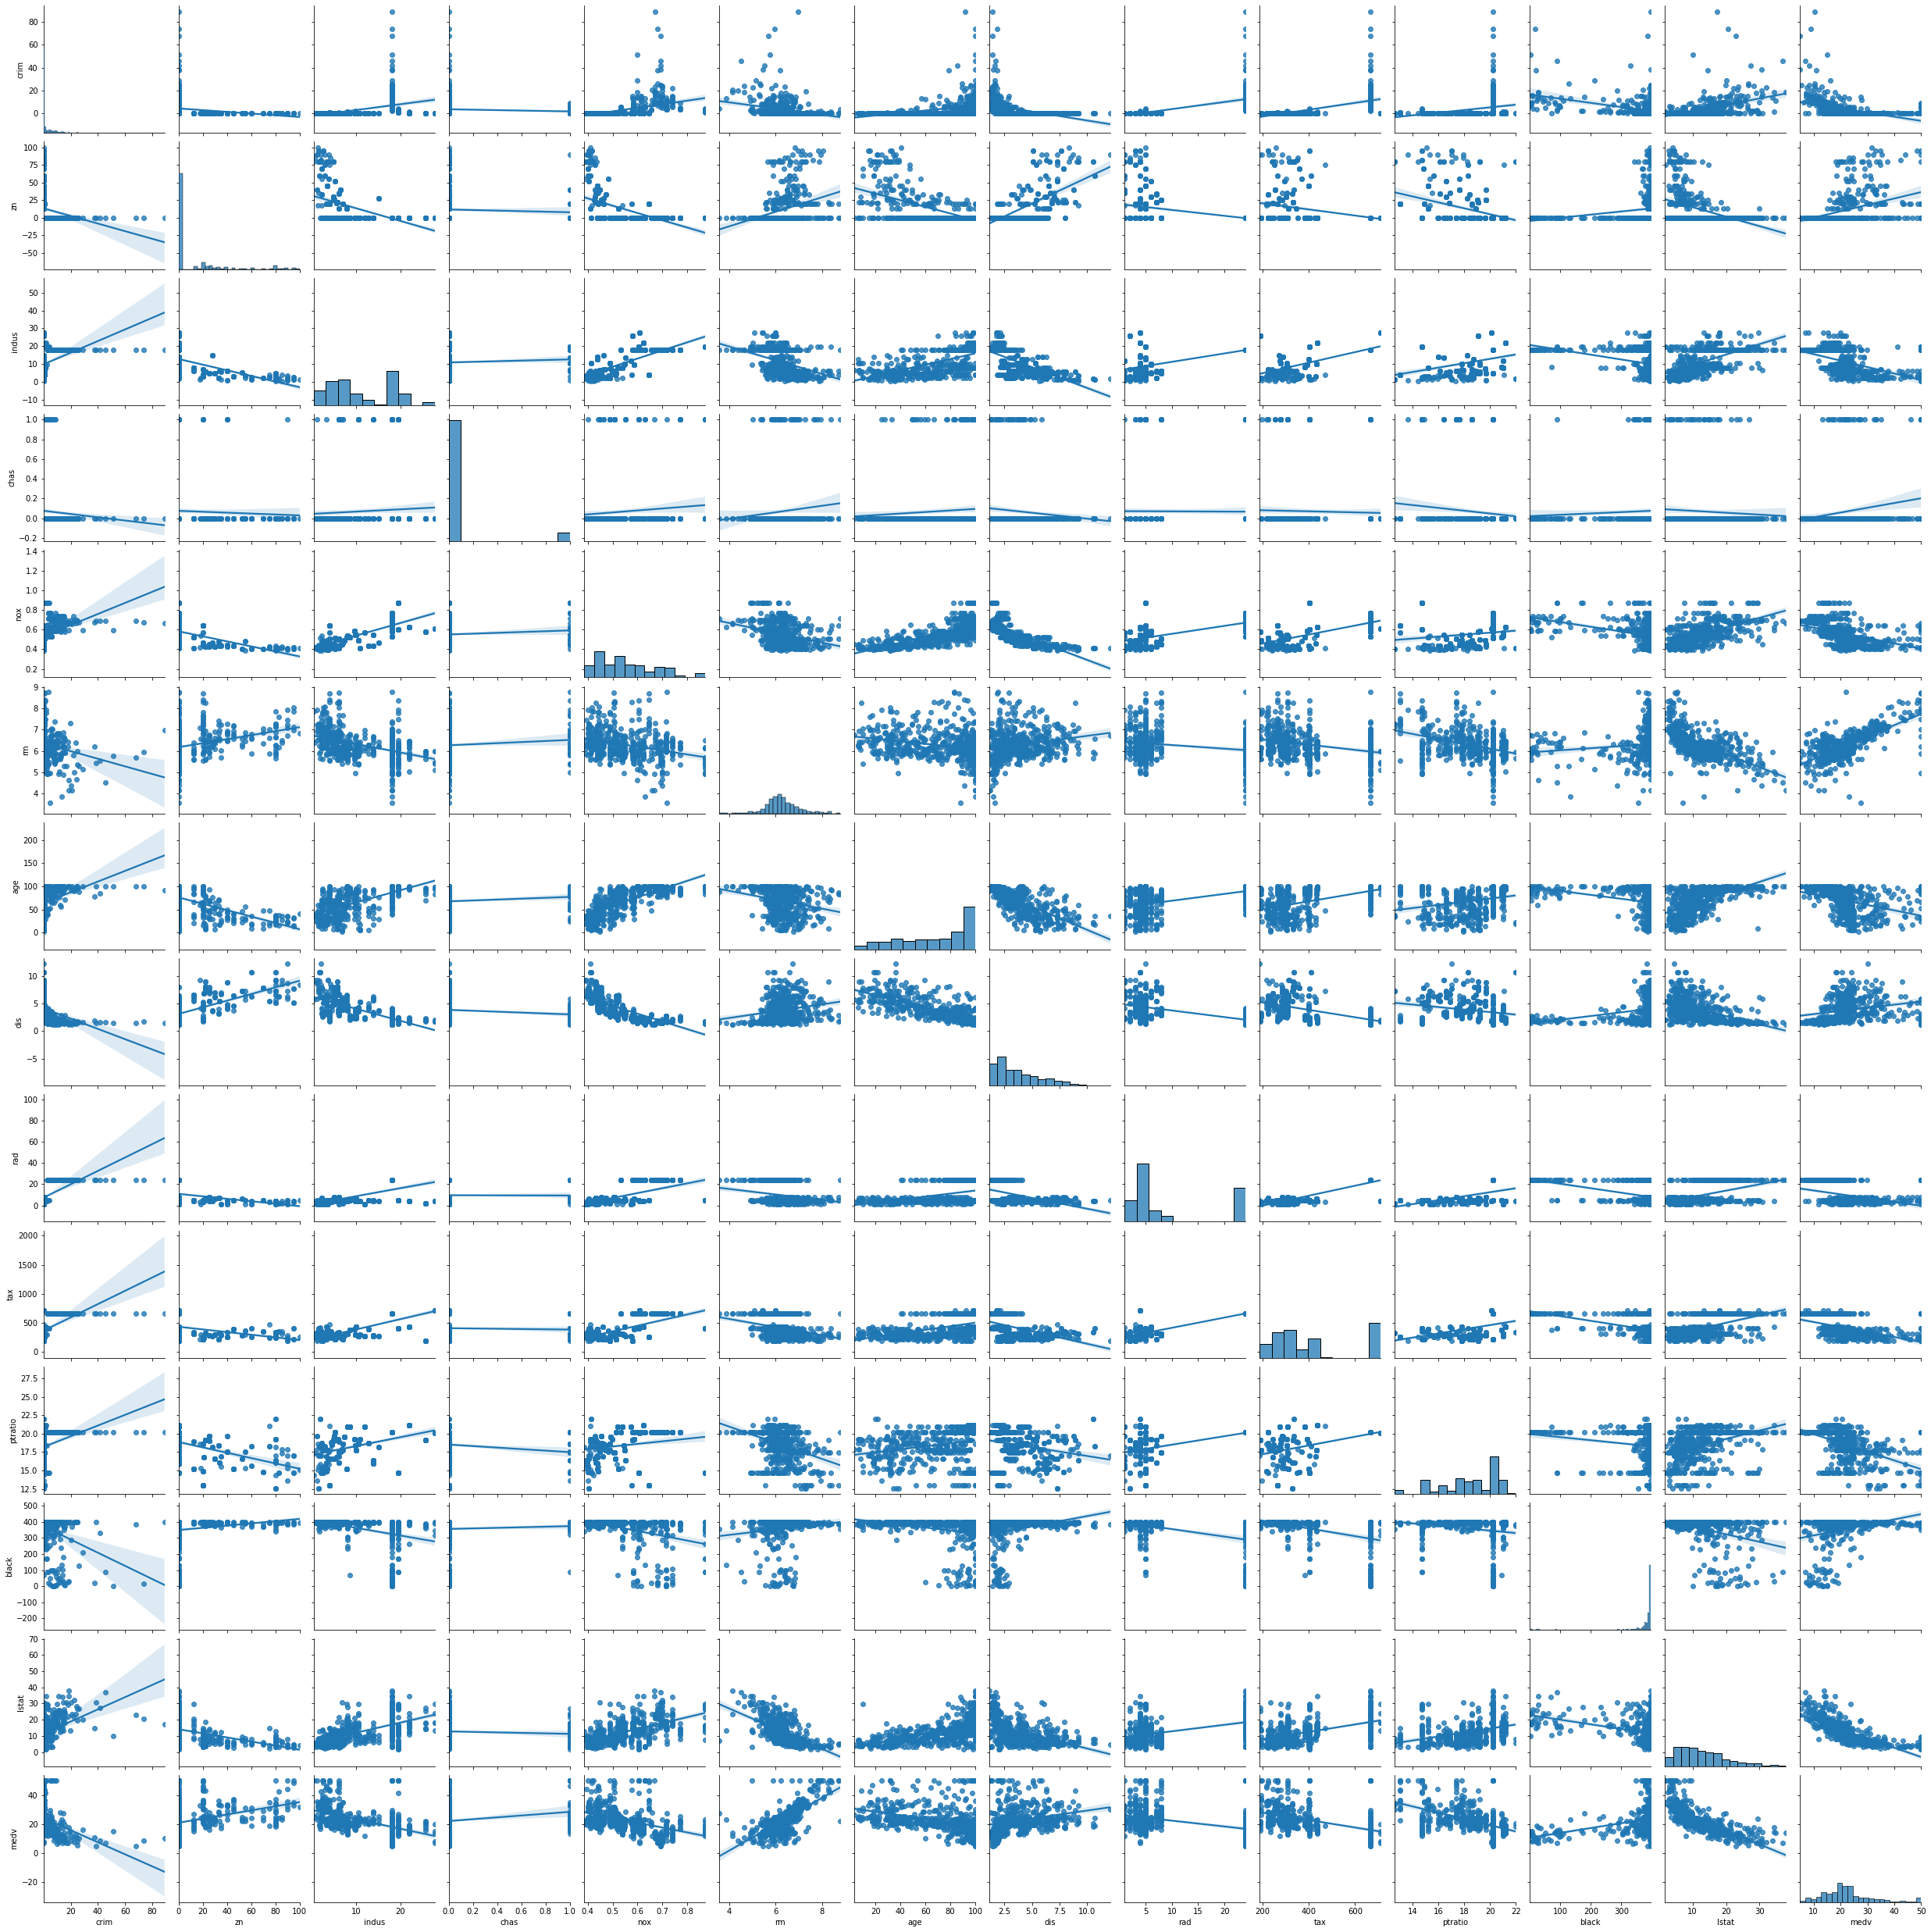

In [14]:
sns.pairplot(data,kind="reg")

## K-NEAREST NEIGHBORS (KNN) REGRESSION

In [15]:
from sklearn.neighbors import KNeighborsRegressor

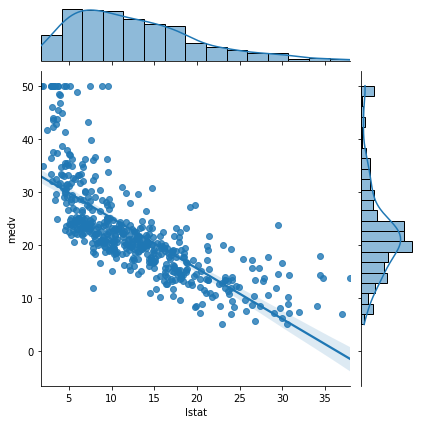

In [21]:
sns.jointplot(x='lstat',y='medv',data=data,kind="reg");

In [26]:
X=data.drop(['medv'],axis=1)
y=data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [27]:
knn_regressor=KNeighborsRegressor().fit(X_train,y_train)
knn_regressor.n_neighbors

5

### PREDICTION

In [28]:
y_pred=knn_regressor.predict(X_test)

In [31]:
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  30.94554736842105
RMSE:  5.562872222909767


In [32]:
# Lets see effect of K- neighbours

MSE=[]
RMSE=[]

for k in range(10):
    k=k+1
    knn_regressor=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_regressor.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)
    print("k= ",k, " MSE: ",mse," RMSE: ",rmse)

k=  1  MSE:  38.376513157894735  RMSE:  6.194877977643687
k=  2  MSE:  33.923503289473686  RMSE:  5.82438866229527
k=  3  MSE:  28.149334795321632  RMSE:  5.305594669339303
k=  4  MSE:  29.36787828947368  RMSE:  5.419213807322394
k=  5  MSE:  30.94554736842105  RMSE:  5.562872222909767
k=  6  MSE:  33.619482821637426  RMSE:  5.798231007957291
k=  7  MSE:  34.83564446831364  RMSE:  5.902172859914698
k=  8  MSE:  36.05690481085527  RMSE:  6.004740195117127
k=  9  MSE:  38.105980344379475  RMSE:  6.173004158785208
k=  10  MSE:  37.84585592105264  RMSE:  6.151898562318192


### MODEL TUNING
Lets find best k value with Grid Search

In [34]:
knn_params={"n_neighbors":np.arange(1,30,1)}
knn=KNeighborsRegressor()
knn_gridSearch=GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)
knn_gridSearch.best_params_

{'n_neighbors': 6}

## REGRESSION TREES
Predict continuous valued outputs.

In [35]:
X=data.drop(["medv"],axis=1)
y=data["medv"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
regg_tree=DecisionTreeRegressor(max_leaf_nodes=10)
regg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

### PREDICTION

In [39]:
y_pred=regg_tree.predict(X_test)
mean_squared_error(y_test,y_pred)

16.155491643578205

### MODEL TUNING

In [41]:
regg_tree_params={"min_samples_split":range(2,7),
                 "max_leaf_nodes":range(2,7)}

regg_tree_gridSearch=GridSearchCV(regg_tree,regg_tree_params,cv=10)
regg_tree_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=10),
             param_grid={'max_leaf_nodes': range(2, 7),
                         'min_samples_split': range(2, 7)})

In [42]:
regg_tree_gridSearch.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 4}

## BAGGED TREES
Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method.
Bootstrapping is the process of randomly sampling subsets of a dataset over a given number of iterations and a given number of variable

In [43]:
X=data.drop(["medv"],axis=1)
y=data["medv"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
bagged_model=BaggingRegressor(bootstrap_features=True)
bagged_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [46]:
bagged_model.estimators_

[DecisionTreeRegressor(random_state=1983593029),
 DecisionTreeRegressor(random_state=1784624207),
 DecisionTreeRegressor(random_state=416100957),
 DecisionTreeRegressor(random_state=96041431),
 DecisionTreeRegressor(random_state=855643607),
 DecisionTreeRegressor(random_state=1202601325),
 DecisionTreeRegressor(random_state=463582705),
 DecisionTreeRegressor(random_state=2064221468),
 DecisionTreeRegressor(random_state=1049651973),
 DecisionTreeRegressor(random_state=828594637)]

In [47]:
# Samples of each tree:
bagged_model.estimators_samples_

[array([239,  26,  98, 271, 334,  43, 136, 263,  56, 211,  97, 182, 278,
        132, 349,  54,  46, 148, 219,  72, 141, 221,  80, 194, 332, 193,
        303, 309, 207,  60, 310, 173,  92,   8, 340,  81, 236, 269, 185,
         25, 241, 270, 232, 327, 305, 269,  66, 170, 240, 158, 351, 141,
         10,  53,  42,  11, 117,  30, 318,  58, 266, 123, 303, 254, 173,
        129, 230, 266, 195, 277, 327, 207,  25, 196,  12, 230, 253, 352,
        195, 302, 239, 304,  17,  38, 334, 108, 157, 352,   8, 351, 321,
         91, 120, 103, 176, 202, 273,  54, 336, 147, 118, 158,  37,   0,
        191, 293,  55, 239, 304, 232, 189,  99, 225, 219, 205, 144, 129,
        135, 181, 290,   3, 203, 163, 348,  81, 309,  90, 298,  82, 169,
        117,  57, 261, 145, 109, 314,  65,  59, 341, 175,  11, 194, 195,
         72, 137, 142, 272,  39, 307, 166, 264, 239,  77, 125, 293, 176,
        230, 157, 346, 187, 138, 237, 217, 300, 324,  97,  38,  87,  90,
        168, 181,  99,  99,  66, 184, 283,  66, 176

In [48]:
# Independent variables of each tree:
bagged_model.estimators_features_

[array([ 5, 12,  1, 12, 10, 12,  9, 10,  5,  1,  6,  0,  7]),
 array([ 6,  0,  9,  3,  1, 11,  2, 10,  6,  5,  2,  1,  8]),
 array([ 7,  4,  5, 11,  0,  0,  8, 10,  4,  9, 10,  9, 11]),
 array([ 7,  7,  4,  8, 11,  4,  6,  1,  3,  8, 10, 12, 12]),
 array([ 7,  6,  6,  5, 10,  2,  7,  0,  8,  5,  6, 11,  6]),
 array([10,  6, 11, 12, 12,  8,  1, 10,  2,  2,  5,  0,  0]),
 array([ 1,  4,  8,  6,  0,  9,  9,  2,  6,  6,  1, 10,  1]),
 array([12,  0,  4,  4,  3,  8,  1, 10,  4,  5,  8,  9, 12]),
 array([ 5,  8,  7,  9,  0, 10, 11,  9,  9, 12,  7,  1, 11]),
 array([ 5,  6,  9,  3, 10,  1, 12, 11, 11,  4,  3,  6,  0])]

In [49]:
# Values of each model:
bagged_model.estimators_[5]

DecisionTreeRegressor(random_state=1202601325)

### PREDICTION

In [50]:
y_pred=bagged_model.predict(X_test)
mean_squared_error(y_test,y_pred)

13.61864605263158

In [51]:
# Lets look all trees:
for i in range(0,len(bagged_model.estimators_features_)):
    
    other_y_pred=bagged_model.estimators_[i].fit(X_train,y_train).predict(X_test)
    print("Tree: ",i,"MSE: ",mean_squared_error(other_y_pred,y_test))

Tree:  0 MSE:  11.415
Tree:  1 MSE:  19.01651315789474
Tree:  2 MSE:  10.450986842105262
Tree:  3 MSE:  11.81171052631579
Tree:  4 MSE:  19.275394736842106
Tree:  5 MSE:  18.809407894736847
Tree:  6 MSE:  19.4925
Tree:  7 MSE:  19.891381578947367
Tree:  8 MSE:  11.751973684210528
Tree:  9 MSE:  12.00434210526316


### MODEL TUNING

In [52]:
bag_params={"n_estimators":range(2,7)}
bag_gridSearch=GridSearchCV(bagged_model,bag_params,cv=10)
bag_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 7)})

In [53]:
bag_gridSearch.best_params_

{'n_estimators': 5}

## RANDOM FORESTS
Evaluation of the predictions produced by multiple decision trees by bringing them together.
Derived from Bagged Trees.

In [55]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [56]:
rf_model.n_estimators

100

### PREDICTION

In [57]:
y_pred=rf_model.predict(X_test)
mean_squared_error(y_pred,y_test)

9.619662013157892

### MODEL TUNING

In [59]:
rf_params={"max_depth":list(range(1,10)),
          "max_features":[3,5],
          "n_estimators":[100,200]}

rf_gridSearch=GridSearchCV(rf_model,rf_params,cv=10)
rf_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5], 'n_estimators': [100, 200]})

In [60]:
rf_gridSearch.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 200}

## EXTREME GRADIENT BOOSTING (xgBOOST)
XGBoost is an implementation of Gradient Boosting.
Decision trees are created in sequential form.

In [66]:
xgb_model=XGBRegressor().fit(X_train,y_train)

In [67]:
y_pred=xgb_model.predict(X_test)
mean_squared_error(y_pred,y_test)

9.238913131574064

### MODEL TUNING

In [68]:
xgb_params={
    
    "colsample_bytree":[0.4,0.5],
    "learning_rate":[0.1,0.01],
    "max_depth":[2,3],
    "n_estimators":[100,200]
}

# colsample_bytree: Number of sample per tree.
# max_depth: Prevent to overfit

In [69]:
xgb_gridSearch=GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_gridSearch.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012...
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n

In [70]:
xgb_gridSearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}